# Student Activity: Portfolio Planner

## Part 2: Portfolio Optimization via Correlation and Return-to-Risk (Sharpe Ratio) Evaluations

Harold has been asked to revisit the ten stocks that were researched in Part 1 of this activity.

Specifically, upper management wants Harold to go beyond just evaluating stocks by volatility/risk and create a more optimized portfolio with the following characteristics:

* Equal-weighted allocations

* Only non-correlated stocks

* Only positive return-to-risk ratio stocks (Sharpe ratios)

Then, they want to visualize the returns of a hypothetical 10,000 investment in such a constructed portfolio over time, as well as how such a portfolio compares to 10,000 investments in less optimized portfolios.

Use the Pandas library to help Harold construct an optimized portfolio of stocks, and then plot and compare the returns of a 10,000 investment in the portfolio over time to less optimized portfolios.

---

## Part 2: Portfolio Optimization via Correlation and Return-to-risk (sharpe ratio) Evaluations

### Instructions - Part 2

#### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

#### Read CSV as DataFrame

In [2]:
# Set the file path
combined_df_path = Path("../Resources/combined_df.csv")

# Read the CSV containing the combined DataFrame created in Part 1
# Set the `date` column as a datetime index to the DataFrame
combined_df = pd.read_csv(combined_df_path, index_col="date", infer_datetime_format=True, parse_dates=True)

# Display sample data
combined_df.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,43.29,77.955,77.955,34.35,24.06,53.110,53.710,35.78,87.73,58.5699
2015-06-25,42.85,76.390,76.390,34.49,24.02,52.610,54.070,36.18,85.95,57.2022
2015-06-26,42.98,75.250,75.250,34.32,19.66,54.855,54.620,36.12,84.45,57.2022
2015-06-29,41.79,75.160,75.160,33.18,18.73,53.835,53.550,35.77,81.96,56.1857
2015-06-30,41.97,75.380,75.380,33.09,18.84,54.010,53.615,35.52,78.42,56.2781


#### Calculate Daily Returns

In [3]:
# Use the `pct_change` function to calculate daily returns
daily_returns = combined_df.pct_change()
daily_returns.head()

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
date,,,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.010164,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290,-0.023352
2015-06-26,0.003034,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452,0.000000
2015-06-29,-0.027687,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485,-0.017770
2015-06-30,0.004307,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192,0.001645


#### Evaluate Correlation of Stock Returns

In [4]:
# Use the `corr` function to calculate the correlation between stock returns
correlation = daily_returns.corr()

# Display correlation matrix
correlation

,BK,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC,WRK
BK,1.000000,0.317462,0.317462,0.390731,0.339511,0.352312,0.361186,0.284662,0.373527,0.473280
FANG,0.317462,1.000000,1.000000,0.170001,0.258782,0.227929,0.211263,0.187070,0.260423,0.294045
JNJ,0.317462,1.000000,1.000000,0.170001,0.258782,0.227929,0.211263,0.187070,0.260423,0.294045
LUV,0.390731,0.170001,0.170001,1.000000,0.296751,0.285755,0.314467,0.220850,0.273768,0.294395
MU,0.339511,0.258782,0.258782,0.296751,1.000000,0.196334,0.247012,0.174143,0.609577,0.405658
NKE,0.352312,0.227929,0.227929,0.285755,0.196334,1.000000,0.398614,0.240217,0.242891,0.271221
SBUX,0.361186,0.211263,0.211263,0.314467,0.247012,0.398614,1.000000,0.238597,0.281220,0.303981
T,0.284662,0.187070,0.187070,0.220850,0.174143,0.240217,0.238597,1.000000,0.153232,0.281383
WDC,0.373527,0.260423,0.260423,0.273768,0.609577,0.242891,0.281220,0.153232,1.000000,0.397666
WRK,0.473280,0.294045,0.294045,0.294395,0.405658,0.271221,0.303981,0.281383,0.397666,1.000000


#### Use the `heatmap` function from the Seaborn library to visualize the correlation table

<AxesSubplot:>

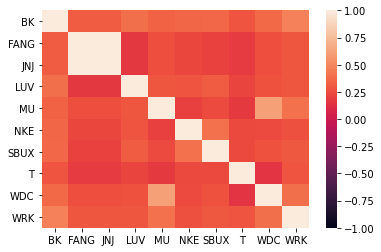

In [5]:
# Import the Seaborn library
import seaborn as sns

# Use the `heatmap` function from the Seaborn library to visualize the correlation table
sns.heatmap(correlation, vmin=-1, vmax=1)

In [6]:
# Alternatively, sum total correlation for each stock
correlation.sum(axis=0).sort_values()

T       2.967223
LUV     3.416718
NKE     3.443199
SBUX    3.567604
MU      3.786550
WDC     3.852727
FANG    3.926974
JNJ     3.926974
WRK     4.015674
BK      4.210133
dtype: float64

#### Drop the Two Most Consistently Correlated Stocks

In [7]:
# Drop highly correlated stocks and keep only the non-correlated stocks
noncorrelated_daily_returns = daily_returns.drop(columns=["WRK", "BK"])

# Display sample data
noncorrelated_daily_returns.head()

,FANG,JNJ,LUV,MU,NKE,SBUX,T,WDC
date,,,,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,-0.020076,0.004076,-0.001663,-0.009414,0.006703,0.011179,-0.020290
2015-06-26,-0.014923,-0.014923,-0.004929,-0.181515,0.042672,0.010172,-0.001658,-0.017452
2015-06-29,-0.001196,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590,-0.009690,-0.029485
2015-06-30,0.002927,0.002927,-0.002712,0.005873,0.003251,0.001214,-0.006989,-0.043192


**Important Note:** Selecting which two stocks to drop is a little subjective. In this case, `WRK` and `BK` were dropped because looking at the heatmap form of the correlation matrix, these stocks appeared to have the consistently highest temperatures (lightest colours); in other words, they had the consistently highest correlation with all of the other stocks.

If we wanted to be more systematic, one potential approach would be to sum each stock's total correlation and then compare. The code for that approach, shown just above, produces the same conclusions.

#### Evaluate Reward-to-Risk (Sharpe Ratio) of Non-Correlated Stocks

In [8]:
# Use the `mean` and `std` functions to calculate the annualized sharpe ratio
sharpe_ratios = (noncorrelated_daily_returns.mean() * 252) / (noncorrelated_daily_returns.std() * np.sqrt(252))

# Display sharpe ratios
sharpe_ratios

FANG    0.421292
JNJ     0.421292
LUV     0.520850
MU      0.435027
NKE     0.585923
SBUX    0.545402
T      -0.050216
WDC    -0.245731
dtype: float64

#### Drop the Three Lowest Sharpe Ratio Stocks

In [9]:
# Drop negative sharpe ratio stocks and keep only the postive sharpe ratio stocks
candidate_daily_returns = noncorrelated_daily_returns.drop(columns=["T", "WDC", "FANG"])

# Display sample data
candidate_daily_returns.head()

,JNJ,LUV,MU,NKE,SBUX
date,,,,,
2015-06-24,NaN,NaN,NaN,NaN,NaN
2015-06-25,-0.020076,0.004076,-0.001663,-0.009414,0.006703
2015-06-26,-0.014923,-0.004929,-0.181515,0.042672,0.010172
2015-06-29,-0.001196,-0.033217,-0.047304,-0.018594,-0.019590
2015-06-30,0.002927,-0.002712,0.005873,0.003251,0.001214


#### Evaluate Investment in Minimally-Correlated (Diversified) and Return-to-Risk (Sharpe Ratio) Optimized Portfolio

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

<AxesSubplot:xlabel='date'>

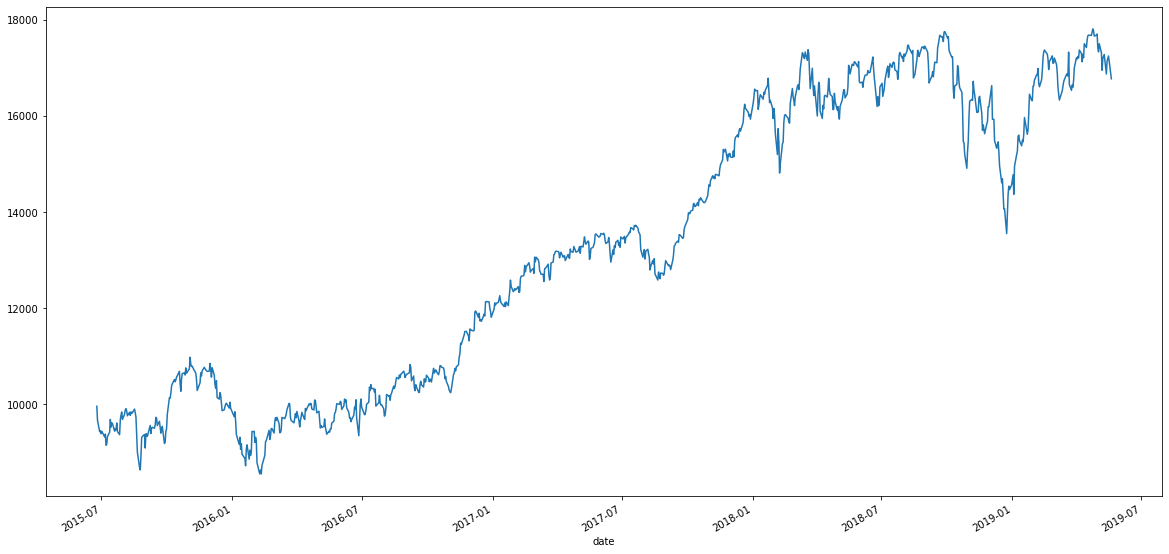

In [10]:
# Set initial investment
initial_investment = 10000

# Set weights
weights = [.2, .2, .2, .2, .2]

# Use the `dot` function to multiply weights by each stock's daily returns to output the optimized portfolio's daily returns
candidate_portfolio_returns = candidate_daily_returns.dot(weights)

# Use the `cumprod` function to calculate the optimized portfolio's cumulative returns
candidate_cumulative_returns = (1 + candidate_portfolio_returns).cumprod()

# Multiply the initial investment of $10,000 against the portfolio's series of cumulative returns
candidate_cumulative_profits = (initial_investment * candidate_cumulative_returns)

# Plot the cumulatives return
candidate_cumulative_profits.plot(figsize=(20,10))

#### Evaluate Investment in Non-Correlated (Diversified) Portfolio

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

<AxesSubplot:xlabel='date'>

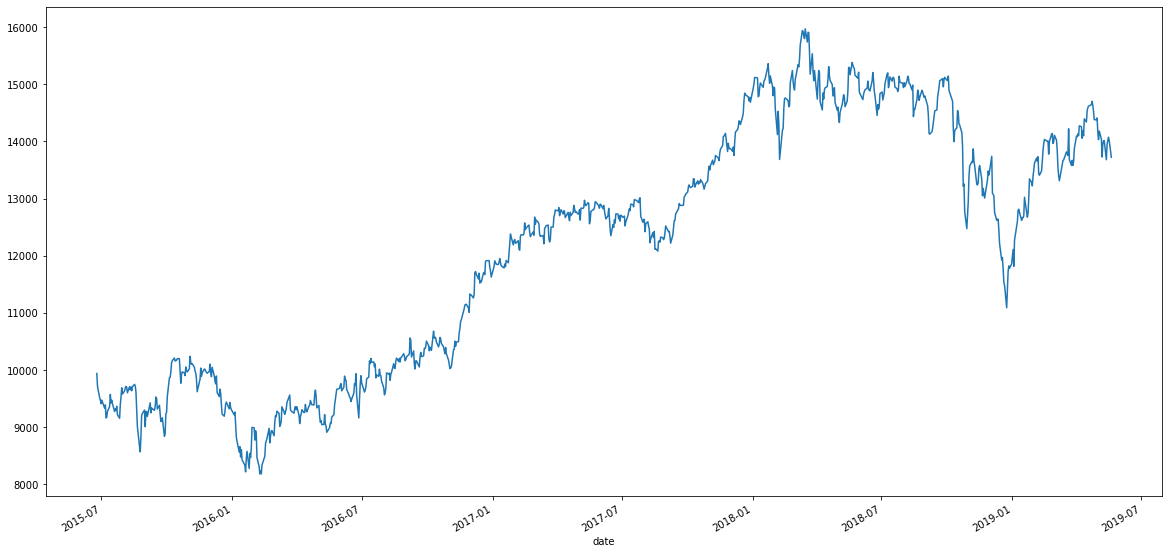

In [11]:
# Set initial investment
initial_investment = 10000

# Set weights
weights = [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]

# Use the `dot` function to multiply weights by each stock's daily returns to output the non-correlated stock portfolio's daily returns
noncorrelated_portfolio_returns = noncorrelated_daily_returns.dot(weights)

# Use the `cumprod` function to calculate the non-correlated stock portfolio's cumulative returns
noncorrelated_cumulative_returns = (1 + noncorrelated_portfolio_returns).cumprod()

# Multiply the initial investment of `$10,000` against the portfolio's series of cumulative returns
noncorrelated_cumulative_profits = (initial_investment * noncorrelated_cumulative_returns)

# Plot the cumulatives return
noncorrelated_cumulative_profits.plot(figsize=(20,10))

#### Evaluate Investment in Original/Unoptimized Portfolio (No Modifications)

Set portfolio weights, calculate daily and cumulative portfolio returns, and plot $10,000 investment over time for optimized portfolio.

<AxesSubplot:xlabel='date'>

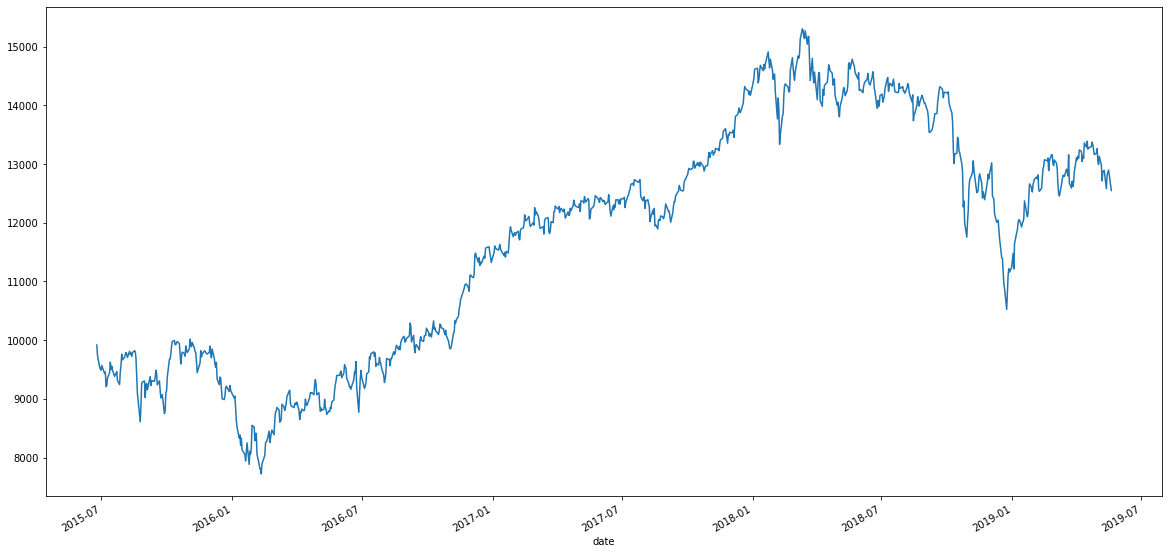

In [12]:
# Set initial investment
initial_investment = 10000

# Set weights
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Use the `dot` function to multiply weights by each stock's daily returns to output the unoptimized portfolio's daily returns
unoptimized_portfolio_returns = daily_returns.dot(weights)

# Use the `cumprod` function to calculate the unoptimized stock portfolio's cumulative returns
unoptimized_cumulative_returns = (1 + unoptimized_portfolio_returns).cumprod()

# Multiply the initial investment of `$10,000` against the portfolio's series of cumulative returns
unoptimized_cumulative_profits = (initial_investment * unoptimized_cumulative_returns)

# Plot the cumulatives return
unoptimized_cumulative_profits.plot(figsize=(20,10))

#### Plot Cumulative Profit from Part 1

<AxesSubplot:xlabel='date'>

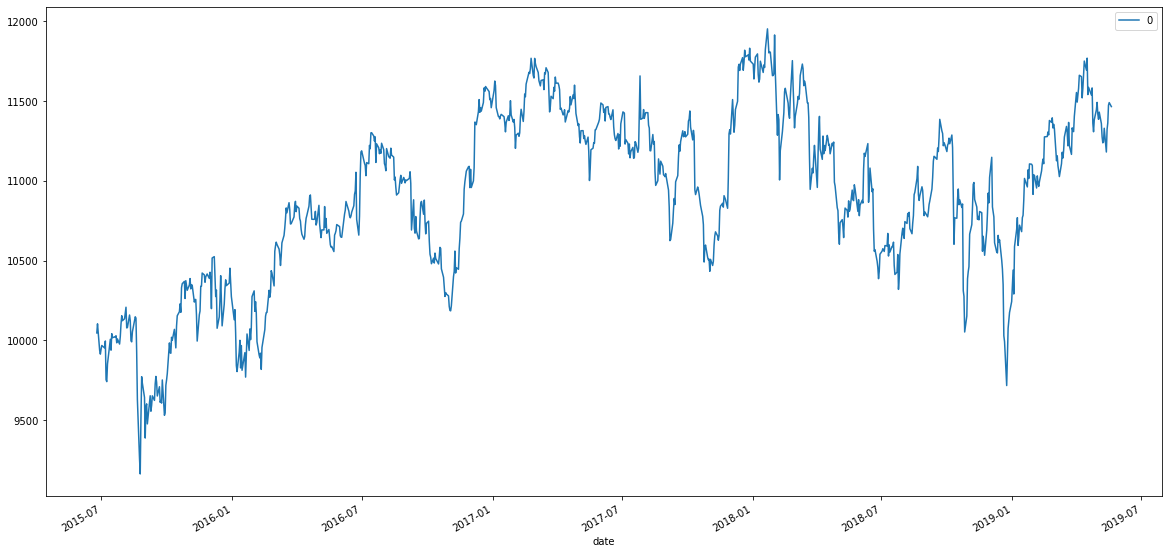

In [13]:
# Re-plot cumulative profit from Part 1 for use in the final overlay plot
# Read the returns information from the provided csv to do so
cumulative_profit_path = Path('../Resources/cumulative_profit.csv')
cumulative_profit = pd.read_csv(cumulative_profit_path, index_col="date", infer_datetime_format=True, parse_dates=True)

# Plot the returns of the investment
cumulative_profit.plot(figsize=(20,10))

### Overlay Hypothetical Portfolio Investments

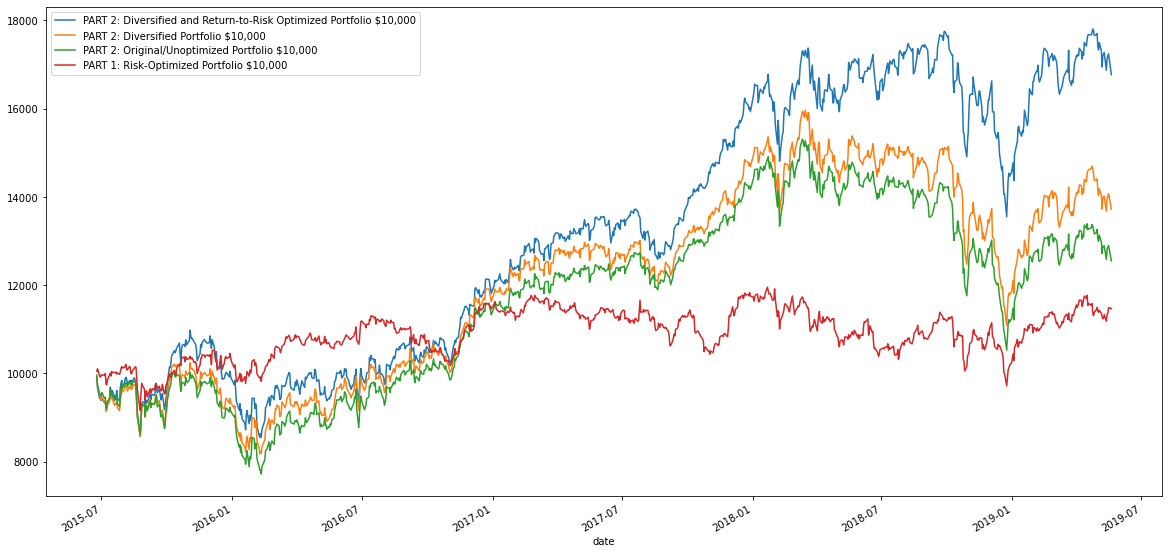

In [14]:
# Set the figure of the chart and plot each data trend on the single figure
ax = candidate_cumulative_profits.plot(figsize=(20,10))
noncorrelated_cumulative_profits.plot(ax=ax)
unoptimized_cumulative_profits.plot(ax=ax)
cumulative_profit.plot(ax=ax)

ax.legend(['PART 2: Diversified and Return-to-Risk Optimized Portfolio $10,000', 
           'PART 2: Diversified Portfolio $10,000', 
           'PART 2: Original/Unoptimized Portfolio $10,000', 
           'PART 1: Risk-Optimized Portfolio $10,000'])